<a href="https://colab.research.google.com/github/sofial47/senalesysistemas/blob/main/taller2lapalaceipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- * $y[n] = x[n]/3 + 2x[n − 1] − y[n − 1]$ para ver si es Lineal e Invariante en el Tiempo (SLIT), debemos verificar dos propiedades:

Linealidad: Un sistema es lineal si satisface las propiedades de aditividad y homogeneidad (o escalamiento).

Aditividad: La respuesta a la suma de dos entradas es la suma de las respuestas a cada entrada por separado. Es decir, si $\mathsf{H}{x_1[n]} = y_1[n]$ y $\mathsf{H}{x_2[n]} = y_2[n]$, entonces $\mathsf{H}{x_1[n] + x_2[n]} = y_1[n] + y_2[n]$.

Homogeneidad: La respuesta a una entrada escalada por una constante es la respuesta original escalada por la misma constante. Es decir, si $\mathsf{H}{x[n]} = y[n]$, entonces $\mathsf{H}{ax[n]} = ay[n]$ para cualquier constante $a$.

Invariancia en el Tiempo: Un sistema es invariante en el tiempo si un desplazamiento en la entrada provoca el mismo desplazamiento en la salida. Es decir, si $\mathsf{H}\{x[n]\} = y[n]$, entonces $\mathsf{H}\{x[n-n_0]\} = y[n-n_0]$ para cualquier desplazamiento $n_0$.

Se analiza cada propiedad: $y[n] = x[n]/3 + 2x[n − 1] − y[n − 1]$.

Verificando Linealidad:

Consideremos dos entradas $x_1[n]$ y $x_2[n]$ con sus respectivas salidas $y_1[n]$ y $y_2[n]$:
$y_1[n] = x_1[n]/3 + 2x_1[n − 1] − y_1[n − 1]$ $y_2[n] = x_2[n]/3 + 2x_2[n − 1] − y_2[n − 1]$

Ahora, consideremos una entrada combinada $x_3[n] = a x_1[n] + b x_2[n]$, donde $a$ y $b$ son constantes. La salida correspondiente $y_3[n]$ sería:
$y_3[n] = x_3[n]/3 + 2x_3[n − 1] − y_3[n − 1]$ $y_3[n] = (a x_1[n] + b x_2[n])/3 + 2(a x_1[n − 1] + b x_2[n − 1]) − y_3[n − 1]$ $y_3[n] = a x_1[n]/3 + b x_2[n]/3 + 2a x_1[n − 1] + 2b x_2[n − 1] − y_3[n − 1]$ $y_3[n] = a(x_1[n]/3 + 2x_1[n − 1]) + b(x_2[n]/3 + 2x_2[n − 1]) − y_3[n − 1]$

Para que sea lineal, $y_3[n]$ debería ser igual a $a y_1[n] + b y_2[n]$.

$a y_1[n] + b y_2[n] = a (x_1[n]/3 + 2x_1[n − 1] − y_1[n − 1]) + b (x_2[n]/3 + 2x_2[n − 1] − y_2[n − 1])$ $a y_1[n] + b y_2[n] = a x_1[n]/3 + 2a x_1[n − 1] − a y_1[n − 1] + b x_2[n]/3 + 2b x_2[n − 1] − b y_2[n − 1]$ $a y_1[n] + b y_2[n] = a(x_1[n]/3 + 2x_1[n − 1]) + b(x_2[n]/3 + 2x_2[n − 1]) − (a y_1[n − 1] + b y_2[n − 1])$

Comparando $y_3[n]$ y $a y_1[n] + b y_2[n]$, observamos que los resultados no dan lo mismo.

Por lo tanto, el sistema no es lineal en general debido a la dependencia de la salida pasada. De una vez podemos concluir que no es SLIT



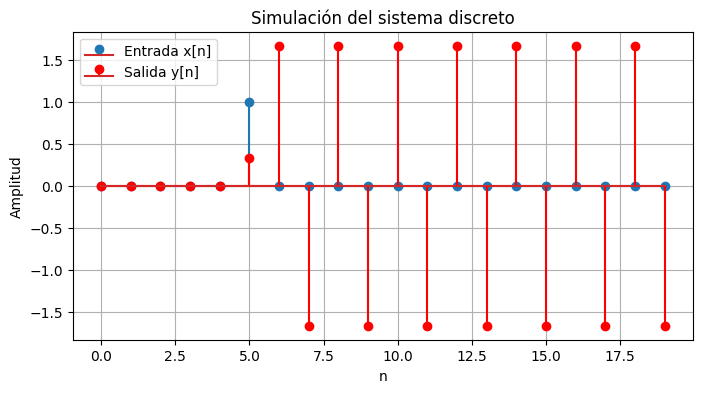

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función para simular el sistema
def simulate_system(x):
    """
    Simula el sistema y[n] = x[n]/3 + 2x[n − 1] − y[n − 1].

    Args:
        x (np.ndarray): Arreglo numpy que representa la señal de entrada x[n].

    Returns:
        np.ndarray: Arreglo numpy que representa la señal de salida y[n].
    """
    N = len(x)
    y = np.zeros(N) # Inicializamos el arreglo de salida con ceros

    # Aplicamos la ecuación de recurrencia
    for n in range(N):
        # Condición para el primer elemento (n=0) donde no hay y[n-1] ni x[n-1]
        if n == 0:
            y[n] = x[n] / 3
        # Condición para el segundo elemento (n=1) donde no hay y[n-1]
        elif n == 1:
            y[n] = x[n] / 3 + 2 * x[n - 1] - y[n - 1]
        # Para n > 1, aplicamos la ecuación completa
        else:
            y[n] = x[n] / 3 + 2 * x[n - 1] - y[n - 1]

    return y

# Ejemplo de uso:

# Creamos una señal de entrada de ejemplo
# Por ejemplo, un pulso unitario (delta de Dirac)
x_input = np.zeros(20)#20 elementos
x_input[5] = 1 # Pulso en el índice 5; amplitud pulso 1 (pulso unitario)

# Simulamos el sistema con la entrada
y_output = simulate_system(x_input)#y_out: respuesta al impulso del sistema.
#simulate_system recibe el array completo x_input como la señal de entrada x.No solo reemplaza un valor, sino que usa la ecuación para calcular la salida y[n] para cada instante de tiempo n, basándose en el valor de la entrada en el instante actual (x[n]), la entrada en el instante anterior (x[n-1]), y la salida en el instante anterior (y[n-1])

# Graficamos la entrada y la salida
plt.figure(figsize=(8, 4))
plt.stem(x_input, label='Entrada x[n]')
plt.stem(y_output, label='Salida y[n]', linefmt='r-', markerfmt='ro')
plt.title('Simulación del sistema discreto')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Puedo probar con otras señales de entrada
# Por ejemplo, un escalón unitario
# x_step = np.ones(20)
# y_step = simulate_system(x_step)
# plt.figure(figsize=(10, 6))
# plt.stem(x_step, label='Entrada escalón x[n]', use_line_collection=True)
# plt.stem(y_step, label='Salida y[n]', linefmt='r-', markerfmt='ro', use_line_collection=True)
# plt.title('Simulación del sistema con entrada escalón')
# plt.xlabel('n')
# plt.ylabel('Amplitud')
# plt.legend()
# plt.grid(True)
# plt.show()

* $y[n] = \sum_{k=-\infty}^{n} x^2[k]$ verificamos las dos propiedades: Linealidad e Invariancia en el Tiempo.

**Propiedad de Linealidad:**

Como se sabe, un sistema es lineal si cumple con las 2 propiedades.

*   **Aditividad:**

    Para el sistema dado:
    $y_1[n] = \sum_{k=-\infty}^{n} x_1^2[k]$

    $y_2[n] = \sum_{k=-\infty}^{n} x_2^2[k]$

    Consideremos una entrada $x_3[n] = x_1[n] + x_2[n]$. La salida $y_3[n]$ es:
    $y_3[n] = \sum_{k=-\infty}^{n} (x_1[k] + x_2[k])^2 = \sum_{k=-\infty}^{n} (x_1^2[k] + 2x_1[k]x_2[k] + x_2^2[k])$
    $y_3[n] = \sum_{k=-\infty}^{n} x_1^2[k] + \sum_{k=-\infty}^{n} 2x_1[k]x_2[k] + \sum_{k=-\infty}^{n} x_2^2[k]$

    $y_3[n] = y_1[n] + \sum_{k=-\infty}^{n} 2x_1[k]x_2[k] + y_2[n]$

    Para que se cumpla la aditividad, $y_3[n]$ debería ser igual a $y_1[n] + y_2[n]$. Sin embargo, debido al término cruzado $\sum_{k=-\infty}^{n} 2x_1[k]x_2[k]$, la aditividad no se cumple en general. El sistema **no es Lineal**, lo que es suficiente para concluir que **no es (SLIT)**.

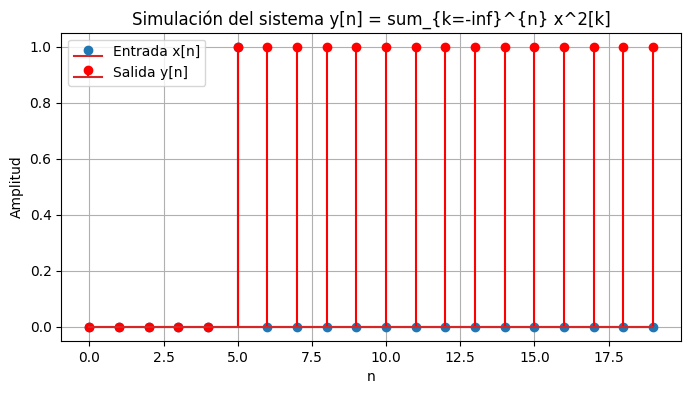

In [4]:
#import numpy as np
#import matplotlib.pyplot as plt

# Definir la función para simular el sistema y[n] = sum_{k=-inf}^{n} x^2[k]
def simulate_cumulative_square_system(x):
    """
    Simula el sistema y[n] = sum_{k=-inf}^{n} x^2[k].

    Args:
        x (np.ndarray): Arreglo numpy que representa la señal de entrada x[n].

    Returns:
        np.ndarray: Arreglo numpy que representa la señal de salida y[n].
    """
    N = len(x)
    y = np.zeros(N) # Inicializamos el arreglo de salida con ceros

    # Aplicamos la ecuación de recurrencia
    # La sumatoria desde -inf hasta n se puede calcular acumulando los cuadrados
    # de los elementos de la entrada hasta el instante actual n.
    # Aquí asumimos que la señal x[n] es 0 para n < 0, lo cual es común en sistemas causales.
    cumulative_sum_of_squares = 0
    for n in range(N):
        cumulative_sum_of_squares += x[n]**2#acomulamos el cuadrado de cada valor de la señal de entrada x[n] a medida que el bucle itera desde el primer elemento (n=0) hasta el último.
        y[n] = cumulative_sum_of_squares
        #Por ejemplo, si tu entrada x fuera [1, 2, 3]:
        #Para n=0: cumulative_sum_of_squares es 0. Se le suma x[0]**2 (que es 1**2 = 1).
        #cumulative_sum_of_squares ahora es 1. y[0] se asigna a 1. Para n=1: cumulative_sum_of_squares es 1. Se le suma x[1]**2 (que es 2**2 = 4).
        #cumulative_sum_of_squares ahora es 1 + 4 = 5. y[1] se asigna a 5.
        #Para n=2: cumulative_sum_of_squares es 5. Se le suma x[2]**2 (que es 3**2 = 9).
        #cumulative_sum_of_squares ahora es 5 + 9 = 14. y[2] se asigna a 14.
        #La salida y sería [1, 5, 14]. Cada valor en y[n] es la suma acumulada hasta ese punto.

    return y

# Ejemplo de uso:

# Creamos una señal de entrada de ejemplo
# Por ejemplo, un pulso unitario
x_input_2 = np.zeros(20)
x_input_2[5] = 1 # Pulso en el índice 5 con amplitud 1

# Simulamos el sistema con la entrada
y_output_2 = simulate_cumulative_square_system(x_input_2)

# Graficamos la entrada y la salida
plt.figure(figsize=(8, 4))
plt.stem(x_input_2, label='Entrada x[n]')
plt.stem(y_output_2, label='Salida y[n]', linefmt='r-', markerfmt='ro')
plt.title('Simulación del sistema y[n] = sum_{k=-inf}^{n} x^2[k]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Otro ejemplo de uso: un escalón unitario
# x_step_2 = np.ones(20)
# y_step_2 = simulate_cumulative_square_system(x_step_2)
# plt.figure(figsize=(8, 4))
# plt.stem(x_step_2, label='Entrada escalón x[n]')
# plt.stem(y_step_2, label='Salida y[n]', linefmt='r-', markerfmt='ro')
# plt.title('Simulación del sistema con entrada escalón')
# plt.xlabel('n')
# plt.ylabel('Amplitud')
# plt.legend()
# plt.grid(True)
# plt.show()